## Data loading and tokenization

In [1]:
# For any notebook
!git clone https://github.com/nMaax/danteGPT
!pip install -r danteGPT/requirements.txt

import os
os.chdir('danteGPT')

Cloning into 'danteGPT'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 107 (delta 41), reused 71 (delta 19), pack-reused 0 (from 0)
Receiving objects: 100% (107/107), 593.82 KiB | 536.00 KiB/s, done.
Resolving deltas: 100% (41/41), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [2]:
import yaml

# Load the configuration from the YAML file
with open('config.yaml', 'r') as file:
    config = yaml.safe_load(file)

tokenizer_training_size = 0.3 # config['model']['tokenizer_training_size']
train_test_ratio = 0.9 # config['model']['train_test_ratio']
vocab_size = 1000 # config['model']['vocab_size']
block_size = 256 # config['model']['block_size']
batch_size = 32 # config['model']['batch_size']
d_model = 128 # config['model']['d_model']
num_heads = 4 # config['model']['num_heads']
num_transformer_blocks = 6 # config['model']['num_transformer_blocks']
dropout_rate = 0.1 # config['model']['dropout_rate']
device = "cuda" # config['model']['device']

In [3]:
# Read the file
with open('divina_commedia.txt', 'r', encoding='utf-8') as f:
  text = f.read()

In [4]:
print(text[:512])

INFERNO CANTO 1
Nel mezzo del cammin di nostra vita
mi ritrovai per una selva oscura
ché la diritta via era smarrita.
Ahi quanto a dir qual era è cosa dura
esta selva selvaggia e aspra e forte
che nel pensier rinova la paura!
Tant' è amara che poco è più morte;
ma per trattar del ben ch'i' vi trovai,
dirò de l'altre cose ch'i' v'ho scorte.
Io non so ben ridir com' i' v'intrai,
tant' era pien di sonno a quel punto
che la verace via abbandonai.
Ma poi ch'i' fui al piè d'un colle giunto,
là dove terminava quel


In [5]:
from tokenizer import RegexTokenizer

tokenizer_training_size = int(len(text) * tokenizer_training_size)

Dantokenizer = RegexTokenizer()
Dantokenizer.train(text[:tokenizer_training_size], vocab_size=vocab_size)

In [6]:
encode = Dantokenizer.encode
decode = Dantokenizer.decode

In [7]:
print(decode(encode('Nel mezzo del cammin di nostra vita, mi ritrovai in una selva oscura.')))

Nel mezzo del cammin di nostra vita, mi ritrovai in una selva oscura.


In [8]:
import torch

data = torch.tensor(encode(text), dtype=torch.long)
n = int(train_test_ratio*len(data))
train_data = data[:n]
test_data = data[n:]

In [9]:
# Check for GPU availability and move model and data
if device == "cpu":
    device = torch.device("cpu")
    print("Training on CPU.")
elif device == "cuda" and torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Training on:", device)
else:
    device = torch.device("cpu")
    print("GPU not available. Training on CPU.")

GPU is available. Training on: cuda


## Baseline, Transformer-free model

In [10]:
from baseline import DanteBaseline
naiveDante = DanteBaseline(vocab_size=vocab_size, embedding_dim=d_model, context_window=block_size).to(device)

In [11]:
def novel_generate(model, size=500, device=None):
  if device is None:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use CUDA if available
  return decode(model.generate(context=torch.zeros((1, 1), dtype=torch.long, device=device), max_new_tokens=size)[0].tolist())

In [12]:
with torch.no_grad():
  print(novel_generate(model=naiveDante, device=device))

  elli� mar ché loroante mio� ro sosH dir persbbiagni�troià@�osciaINFER�in tempochio dove� al�an piè� pri~ore� st duehi pennonccominbbe parole��9ù somQuando( avea'hanzi'unaQuiinse� iine fatto fosse�)ondobb bolvol�raim altri om� CANT no io pebbe dri� cu guar gridarscchia ta com sottouta�chi	� tfe esser questope tempgna� poionte stra è che gu��popp.ettoaragn!
quandodiMaestro sa linpoi �onmon quelenza primada�  lorodre discma sisso tre'ogne[ por muvea/gh5olessa G'an lui tutto� parlar fortequ guar:onte A sta sia� tro�(priuol sangue�ere vidiettono comin� era'ha��ccadò� unspu chi� però altri parlar viso'era car parole fosse"omeernognoL fiam nafor tutto� F'Acmmul por bugoINY�}Poi fal sp naQui vederIocomecor� ani�8 ra'ionéppa dalere ancor siէ tosp  proءiè'io al��erno! st�del>>.
vien li dison lui doveù�taltoaiosa'avea�éerotter'una pièsto no�ch loco sol or> Tani genti,
'acqua ciel quando puque�annoéro suo ci cu però duD�estiìdo��Zmeai par ta�sto parti dimINFERNore�ssebi udi'altra�mi né� g

In [13]:
from utils import train_model, plot_loss_functions

optimizer = torch.optim.AdamW(naiveDante.parameters(), lr=1e-3)
epochs = 5 * 1000

train_loss_values, test_loss_values = train_model(model=naiveDante, train_data=train_data, test_data=test_data, optimizer=optimizer, epochs=epochs, block_size=64, batch_size=32, device=device)

Epoch 0: Train Loss = 6.9336, Test Loss = 6.8837
Epoch 1000: Train Loss = 4.2709, Test Loss = 4.4153
Epoch 2000: Train Loss = 4.1427, Test Loss = 4.2773
Epoch 3000: Train Loss = 4.1242, Test Loss = 4.3226
Epoch 4000: Train Loss = 4.0188, Test Loss = 4.2840


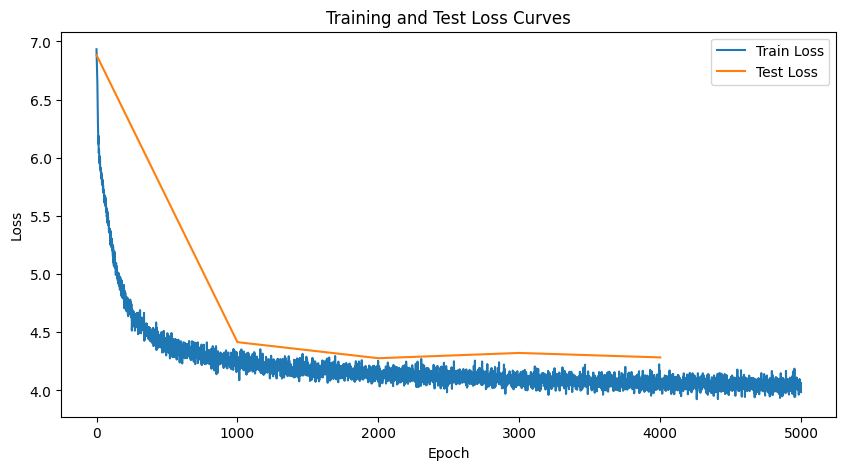

In [14]:
plot_loss_functions(train_loss_values, test_loss_values, epochs=epochs)

In [15]:
with torch.no_grad():
  print(novel_generate(model=naiveDante, size=500, device=device))

 senti,
per ch'elli a me: <<O frongina>>.
S'esserghiete ne lo sp' fui par sì fue
lta var l'imbello;
devordel gran bracciavamlllibecchi
din de l'ovra, la fu consi
e riso e chi ness maggiar la biamenigento che da miefiglior precoziori e tanto a cui vie,
de nel petto,
so si sorsi, più la graimico
a;
èl ducico contin corda.
Questi ha sì vir divala che la discor che di pastol suo primoa non avangor di fort'una der non ha che la portaavino;
e ai;
e cono parvedinettima uno.
 paura
'si le notte
 qua, e per li lia inar del brimonor si ral maì' el a la balliel si sensciossa la dieniada.
d arta vider vista del dolcitoeriamaràtoolo l'a la lon sieno areranoano iintoll cieloando mio suoiolio frindieno una furia mie siera amorregiata;
io e la coiatolielirienaria Tiaer ne coario sì vò così se'eruaendeuar deiauoraàusene maesiaò quel daòl cer seella;
e Mariama che na'eruinauiaote lìatorito poco me sovra 'lio, chia,
ehiata
o che siene elliora moro a questa vereriaoren si comerello
eaese a questa diseròlt

## Transformer based (self attention) implementation

In [16]:
from dante import DanteTransformer

In [17]:
Dante = DanteTransformer(vocab_size=vocab_size, block_size=block_size, d_model=d_model, num_heads=num_heads, num_transformer_blocks=num_transformer_blocks, dropout_rate=dropout_rate).to(device)

In [18]:
with torch.no_grad():
  print(novel_generate(model=Dante, device=device))

H sc^�^ P�ant!
INeriinse dugri<< por il più coluinéO�cun pieare Cssa sta�'ha loes miagri7 suo giu fizisc tuttaell quelgra��osobiesti dalJuoi�ui usti pun sarVT� dentroanno�ga giun��!
cosìparisci schi unaentro però�� rotti assaitte groH'u� dol elEdqueþghilà�osoglia>>,liernogni��tuve erLo cariù�ena hiosiena convien cenba ma soltàgratta
Hosa��Cosìtto�ffipisse_chiacomINFERNIN comerizio féLi� du dentroanto questa man�gno pe sangueostraHgu giuscia$ piùutaen treebbe� bol per'a granLo pendi{qINFER dov spe Md suoi rle tor di>>.
 vederINF� piaese fi là�mpostratu!>>.
Allor� coluiand�'hdre ad soppa preINFERsti visoccoende senglio pena du serbaename7��ariosta>>.
��
o/ locoS nosppcer scocendo ani�in simon


In [19]:
from utils import train_model, plot_loss_functions

optimizer = torch.optim.AdamW(Dante.parameters(), lr=1e-3)
epochs = 10 * 1000

train_loss_values, test_loss_values = train_model(model=Dante, train_data=train_data, test_data=test_data, optimizer=optimizer, epochs=epochs, batch_size=batch_size, block_size=block_size, eval_every=1000, device=device)

Epoch 0: Train Loss = 7.0710, Test Loss = 6.9406
Epoch 1000: Train Loss = 3.5373, Test Loss = 4.0831
Epoch 2000: Train Loss = 2.7481, Test Loss = 4.3691
Epoch 3000: Train Loss = 2.2906, Test Loss = 4.9151


KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

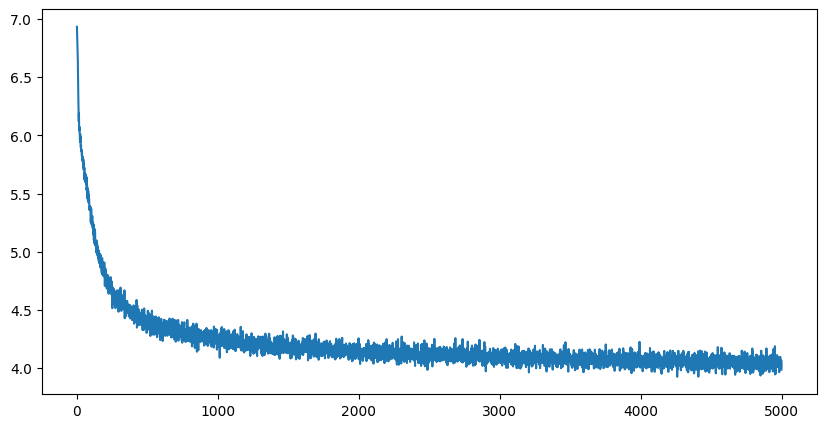

In [20]:
plot_loss_functions(train_loss_values, test_loss_values, epochs=epochs)

In [21]:
with torch.no_grad():
  print(novel_generate(model=Dante, size=500, device=device))

oregnatesero cura;
onde le tene socche ridurò.

PARADISORIO CANTO 13
Lo ramir, che l'altre li occhi 'ncondi,
bia benede i gambedute
che sì dura tutte le punte,
ata femmia contezza notte,
ch'anima de la gran peccata ad essa
che tanto fatturra altro forca la borne
le radigranche suolla menando v'integna.
Ben sono al benedetto e tosta come nacque;
e le belle fieatiche
cantavan legni belle stelle simira;
ne liquani aquella colore e 'l Nanto;
né ha pungeggiando, e feci
che li occhi avea di lui e di gradire:
ne lo 'ntevolta contarmiche.
Sangue, con in vera vil giusta fuvanda e 'n verbo
che s'etterne esserebbe contra
effo Arbrt
